In [1]:
# 표 시각화 하기

In [2]:
import pandas as pd

In [3]:
df = pd.DataFrame(            # dict 딕셔너리로 만듬
    {
        'Name':['BOb','John','Foo','Bar','Alex','Tom'],
        'Math':['A+','B','A','F','D','C'],
        'English':['C','B','B','A+','F','A'],
        'Age':[13,16,16,15,15,13]
    }
)

In [4]:
df

,Name,Math,English,Age
0,BOb,A+,C,13
1,John,B,B,16
2,Foo,A,B,16
3,Bar,F,A+,15
4,Alex,D,F,15
5,Tom,C,A,13


In [5]:
#df['Name'][0]      # 'BOb'
#[df['Name'],['Math']]
NM = [df['Name'],df['Math']]
NE = [df['Name'],['English']]
[NM,NE]

[[0     BOb
  1    John
  2     Foo
  3     Bar
  4    Alex
  5     Tom
  Name: Name, dtype: object,
  0    A+
  1     B
  2     A
  3     F
  4     D
  5     C
  Name: Math, dtype: object],
 [0     BOb
  1    John
  2     Foo
  3     Bar
  4    Alex
  5     Tom
  Name: Name, dtype: object,
  ['English']]]

In [6]:
import pandas as pd

dp = pd.DataFrame(
    {
        'Name':[NM,NE]
    }
)

In [7]:
dp

,Name
0,"[[BOb, John, Foo, Bar, Alex, Tom], [A+, B, A, ..."
1,"[[BOb, John, Foo, Bar, Alex, Tom], [English]]"


In [8]:
pd.concat([df.iloc[:,[0,1]],df.iloc[:,[0,2]]])






,Name,Math,English
0,BOb,A+,NaN
1,John,B,NaN
2,Foo,A,NaN
3,Bar,F,NaN
4,Alex,D,NaN
5,Tom,C,NaN
0,BOb,NaN,C
1,John,NaN,B
2,Foo,NaN,B
3,Bar,NaN,A+


In [15]:
pd.concat([df.iloc[:,[0,1]],df.iloc[:,[0,2]]])

,Name,Math,English
0,BOb,A+,NaN
1,John,B,NaN
2,Foo,A,NaN
3,Bar,F,NaN
4,Alex,D,NaN
5,Tom,C,NaN
0,BOb,NaN,C
1,John,NaN,B
2,Foo,NaN,B
3,Bar,NaN,A+


In [13]:
[df.iloc[:,[0,1]]]

[   Name Math
 0   BOb   A+
 1  John    B
 2   Foo    A
 3   Bar    F
 4  Alex    D
 5   Tom    C]

In [47]:
# Unpivot: colunms to value
math = df.iloc[:,[0,1,-1]]
math.columns = ['Name','Grade','Age']

english = df.iloc[:,[0,2,-1]]
english.columns = ['Name','Grade','Age']

In [48]:
math['Subject'] = 'Math'
english['Subject'] = 'English'

In [49]:
pd.concat([math, english])             # 컬럼을 밸류로 <> 피벗은 밸류를 컬럼으로 바꾸는 작업

,Name,Grade,Age,Subject
0,BOb,A+,13,Math
1,John,B,16,Math
2,Foo,A,16,Math
3,Bar,F,15,Math
4,Alex,D,15,Math
5,Tom,C,13,Math
0,BOb,C,13,English
1,John,B,16,English
2,Foo,B,16,English
3,Bar,A+,15,English


In [53]:
df.melt('Name')             # variable 카테고리정보 value에는 

,Name,variable,value
0,BOb,Math,A+
1,John,Math,B
2,Foo,Math,A
3,Bar,Math,F
4,Alex,Math,D
5,Tom,Math,C
6,BOb,English,C
7,John,English,B
8,Foo,English,B
9,Bar,English,A+


In [62]:
df2 = df.melt(['Name','Age'])                       # melt() 
df2.columns = ['Name','Age','Subject','Grade']

In [63]:
df2

,Name,Age,Subject,Grade
0,BOb,13,Math,A+
1,John,16,Math,B
2,Foo,16,Math,A
3,Bar,15,Math,F
4,Alex,15,Math,D
5,Tom,13,Math,C
6,BOb,13,English,C
7,John,16,English,B
8,Foo,16,English,B
9,Bar,15,English,A+


In [64]:
### 문제풀이
df3 = df2.melt(['Name','Subject']) 

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:

sns.barplot(data=df2, x='Name', y='Grade', hue='Subject')  #  df2.index
plt.xlabel('Name')
plt.ylabel('Grade')
plt.title('Grades by subject')
plt.show

TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [74]:
df2.index

RangeIndex(start=0, stop=12, step=1)

In [78]:
sns.set() # 

In [79]:
df2['Grade'].replace({'F':0,'D':1,'D+':2,'C':3,'C+':4,'B':5,'B+':6,'A':7,'A+':8}, inplace=True)

In [83]:
df2

,Name,Age,Subject,Grade
0,BOb,13,Math,8
1,John,16,Math,5
2,Foo,16,Math,7
3,Bar,15,Math,0
4,Alex,15,Math,1
5,Tom,13,Math,3
6,BOb,13,English,3
7,John,16,English,5
8,Foo,16,English,5
9,Bar,15,English,8


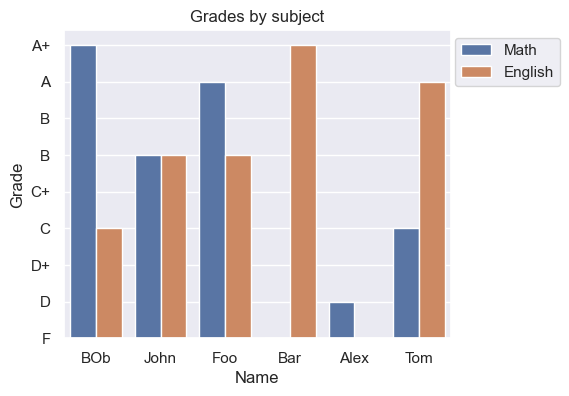

In [84]:
plt.subplots(figsize=(5,4))
sns.barplot(data=df2, x='Name', y='Grade', hue='Subject')
plt.yticks(range(9),['F','D','D+','C','C+','B','B','A','A+']) # 확인
plt.title('Grades by subject')
plt.legend(bbox_to_anchor=(1.3 ,1.0), loc="upper right") # 확인
plt.savefig('grades.png', bbox_inches='tight')
plt.show()

In [4]:
import pandas as pd

In [5]:
seoul = pd.read_csv('../Python/서울시 부동산 실거래가 정보.csv', encoding='cp949')

C:\Users\user\AppData\Local\Temp\ipykernel_20072\3610592111.py:1: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  seoul = pd.read_csv('../Python/서울시 부동산 실거래가 정보.csv', encoding='cp949')


# 실습

- 저층(~3층)과 고층(4층~) 사이의 물건금액이 차이가 나는지 알아보도록 하자.

저층 고층 '층'  물건금액 차이 물건금액(만원)

- 해당 분석 이후, 같은 데이터로 추가 분석이 있습니다.

In [102]:
#seoul

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
0,2024,11545,금천구,10200,독산동,1.0,대지,292.0,11.0,디밸리,...,17000,20.11,33.486,6.0,NaN,NaN,2022.0,오피스텔,직거래,NaN
1,2024,11545,금천구,10300,시흥동,NaN,NaN,NaN,NaN,NaN,...,155000,362.18,217.000,NaN,NaN,NaN,2015.0,단독다가구,중개거래,서울 금천구
2,2024,11545,금천구,10100,가산동,1.0,대지,776.0,0.0,가산대명벨리온,...,11750,16.61,25.800,12.0,NaN,NaN,2017.0,오피스텔,중개거래,"서울 구로구, 서울 마포구"
3,2024,11545,금천구,10100,가산동,1.0,대지,776.0,0.0,가산대명벨리온,...,11750,16.61,25.800,12.0,NaN,NaN,2017.0,오피스텔,중개거래,"서울 구로구, 서울 마포구"
4,2024,11545,금천구,10300,시흥동,1.0,대지,984.0,69.0,조양휴캐슬(984-69),...,30000,47.63,23.000,5.0,NaN,NaN,2015.0,연립다세대,중개거래,서울 금천구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58468,2006,11545,금천구,10200,독산동,1.0,대지,1002.0,0.0,진도1차,...,16900,84.84,NaN,9.0,NaN,NaN,1996.0,아파트,NaN,NaN
58469,2006,11545,금천구,10300,시흥동,1.0,대지,1010.0,0.0,벽산,...,14000,59.94,NaN,9.0,NaN,NaN,2000.0,아파트,NaN,NaN
58470,2006,11545,금천구,10200,독산동,NaN,NaN,NaN,NaN,NaN,...,37500,264.80,287.200,NaN,NaN,NaN,1978.0,단독다가구,NaN,NaN
58471,2006,11545,금천구,10300,시흥동,1.0,대지,1011.0,0.0,우방,...,27500,84.84,NaN,13.0,NaN,NaN,2002.0,아파트,NaN,NaN


In [6]:
#[seoul['층'] <= 3] 저층 ~3층
#
#[seoul['층'] >= 4]# == True] seoul[
# for x in seoul['층'] >= 4:
#     print(x)

#titanic['Check'] = (m1&m2&m3).apply(lambda x: 'O' if x else 'X')
for x in seoul['층'] >= 4
    


SyntaxError: expected ':' (1986445182.py, line 8)

In [7]:
if [seoul['층'] >= 4] == True:
    print(seoul['층'])

In [8]:
seoul['층']

0         6.0
1         NaN
2        12.0
3        12.0
4         5.0
         ... 
58468     9.0
58469     9.0
58470     NaN
58471    13.0
58472     1.0
Name: 층, Length: 58473, dtype: float64

In [9]:
def floor(x):
    if x <= 3:
        return '저층'
    elif x >= 4:
        return '고층'
    else:
        return float('NaN')

seoul['고층'] = seoul['층'].apply(floor)

In [11]:
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rc('font', family='Malgun Gothic')
mpl.rcParams['axes.uncode_minus'] = False

KeyError: 'axes.uncode_minus is not a valid rc parameter (see rcParams.keys() for a list of valid parameters)'

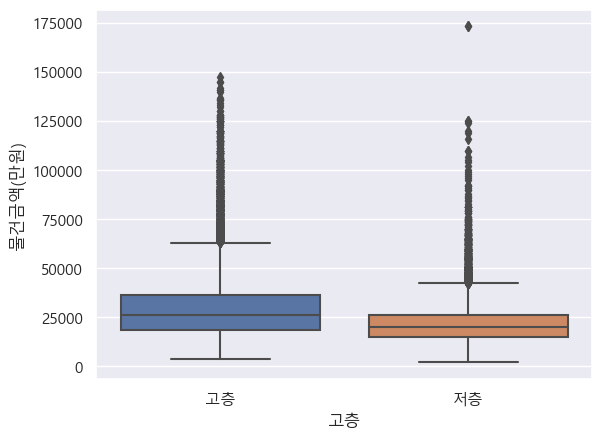

In [130]:
sns.boxplot(data=seoul, x='고층', y='물건금액(만원)')
plt.show()

In [131]:
import math          # 표준화의 대표적 방법

In [132]:
seoul['물건금액(log2 만원)'] = seoul['물건금액(만원)'].apply(math.log2)

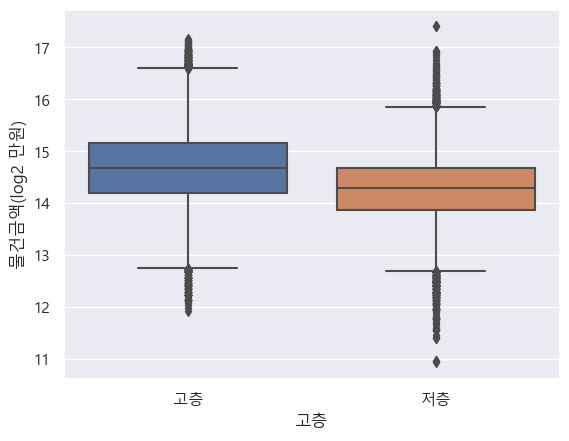

In [133]:
sns.boxplot(data=seoul, x='고층', y='물건금액(log2 만원)')
plt.show()

In [134]:
from scipy import stats

In [137]:
m = seoul['고층'] == '고층'
m2 = seoul['고층'] == '저층'
# stats 이라는 모듈에 ttest_ind 라는 통계분석 관련 함수 a그룹과 b그룹사이 비교후 상관이 있는지 없는지 비교
stats.ttest_ind(seoul[m]['물건금액(log2 만원)'], seoul[m2]['물건금액(log2 만원)'])  

TtestResult(statistic=66.78462489984318, pvalue=0.0, df=52691.0)

In [138]:
stats.ttest_ind(seoul[seoul['고층'] == '고층']['물건금액(log2 만원)'], seoul[seoul['고층'] == '저층']['물건금액(log2 만원)'])

TtestResult(statistic=66.78462489984318, pvalue=0.0, df=52691.0)

In [139]:
a = seoul[m]['물건금액(log2 만원)']
b = seoul[m2]['물건금액(log2 만원)']

In [140]:
stats.ttest_ind(a,b)

TtestResult(statistic=66.78462489984318, pvalue=0.0, df=52691.0)

In [143]:
stats.shapiro(seoul['물건금액(log2 만원)'])             # shapiro test 방법 물건금액에서 고층인지 저층인지 의 값데이터

C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9933058023452759, pvalue=3.671401976531021e-43)

In [146]:
seoul[m2]['물건금액(log2 만원)']

5        13.086800
6        14.550446
11       14.632541
12       13.965784
17       14.896522
           ...    
58460    14.666224
58463    13.793603
58465    13.464035
58467    12.550747
58472    13.965784
Name: 물건금액(log2 만원), Length: 20252, dtype: float64

In [149]:
stats.ks_2samp(a,b)

KstestResult(statistic=0.26065008956565605, pvalue=0.0, statistic_location=14.501837184902296, statistic_sign=-1)

In [150]:
stats.mannwhitneyu(a,b)          #  

MannwhitneyuResult(statistic=438816429.0, pvalue=0.0)

In [151]:
seller = pd.read_excel('../../Downloads/BestSellerList.xlsx')

# 실습

- 판매 순위가 높은 그룹과 낮은 그룹을 비교했을 때, 높은 그룹의 책 가격이 더 비싼 경향이 있는지 확인해보기.
  
  (중간값보다 숫자가 낮으면 낮은순위 높으면 높은순위)
  
  
- 판매 순위가 높은 그룹과 낮은 그룹 사이에서, 장르가 서로 비슷한 경향이 있는지 알아보기.

In [152]:
seller

,월,순위,도서명,저자,출판사,출판 일자,정가,적립포인트,대분야,ISBN
0,2021년,1,달러구트 꿈 백화점(레인보우 에디션),이미예,팩토리나인,20200708,13800,690,판타지소설,9791165341909
1,2021년,2,주린이가 가장 알고 싶은 최다질문 TOP 77(교보 단독 리커버),염승환,메이트북스,20210726,18000,900,주식투자,9791160023459
2,2021년,3,미드나잇 라이브러리(평행우주 에디션),매트 헤이그,인플루엔셜,20210428,15800,790,영미소설일반,9791191056556
3,2021년,4,조국의 시간,조국,한길사,20210531,17000,850,정치가,9788935668663
4,2021년,5,소크라테스 익스프레스,에릭 와이너,어크로스,20210428,18000,900,고대/그리스철학,9791190030922
...,...,...,...,...,...,...,...,...,...,...
1095,10월,96,누구에게도 상처받을 필요는 없다,지민석,스튜디오오드리,20220408,14000,700,한국에세이,9791191043709
1096,10월,97,그리스 로마 신화 30: 기나긴 모험 그 끝의 이야기,박시연,아울북,20220914,15000,750,종교/신화,9788950971656
1097,10월,98,참 괜찮은 태도,박지현,메이븐,20220930,16800,840,인문교양,9791190538480
1098,10월,99,인생의 역사,신형철,난다,20221017,18000,900,한국에세이,9791191859379


In [162]:
selmed = seller['순위'].median()
seller['순위']

0         1
1         2
2         3
3         4
4         5
       ... 
1095     96
1096     97
1097     98
1098     99
1099    100
Name: 순위, Length: 1100, dtype: int64

In [165]:
def bgroup(x):
    if x <= selmed:
        return '낮은 그룹'
    elif x > selmed:
        return '높은 그룹'
    else:
        return 'NaN'
    
seller['낮은 그룹'] = seller['순위'].apply(bgroup)

In [166]:
seller['낮은 그룹']

0       낮은 그룹
1       낮은 그룹
2       낮은 그룹
3       낮은 그룹
4       낮은 그룹
        ...  
1095    높은 그룹
1096    높은 그룹
1097    높은 그룹
1098    높은 그룹
1099    높은 그룹
Name: 낮은 그룹, Length: 1100, dtype: object

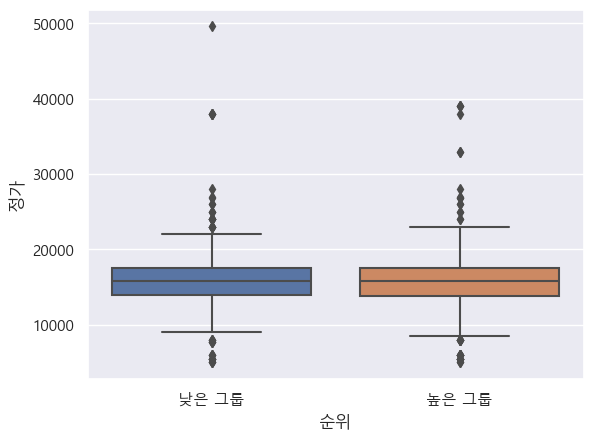

In [173]:
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rc('font', family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False
sns.boxplot(data=seller, x='낮은 그룹', y='정가')
plt.xlabel('순위')
plt.show()

In [186]:
seller[seller['대분야'].str.contains('소설')]

,월,순위,도서명,저자,출판사,출판 일자,정가,적립포인트,대분야,ISBN,낮은 그룹
0,2021년,1,달러구트 꿈 백화점(레인보우 에디션),이미예,팩토리나인,20200708,13800,690,판타지소설,9791165341909,낮은 그룹
2,2021년,3,미드나잇 라이브러리(평행우주 에디션),매트 헤이그,인플루엔셜,20210428,15800,790,영미소설일반,9791191056556,낮은 그룹
7,2021년,8,달러구트 꿈 백화점 2(레인보우 에디션),이미예,팩토리나인,20210727,13800,690,판타지소설,9791165343729,낮은 그룹
8,2021년,9,완전한 행복,정유정,은행나무,20210608,15800,790,한국소설일반,9791167370280,낮은 그룹
10,2021년,11,아몬드,손원평,창비,20170331,12000,600,한국소설일반,9788936434267,낮은 그룹
...,...,...,...,...,...,...,...,...,...,...,...
1070,10월,71,모순,양귀자,쓰다,20130401,13000,650,한국소설일반,9788998441012,높은 그룹
1082,10월,83,달러구트 꿈 백화점(레인보우 에디션),이미예,팩토리나인,20200708,13800,690,판타지소설,9791165341909,높은 그룹
1086,10월,87,"칵테일, 러브, 좀비 (리커버)",조예은,안전가옥,20200413,10000,500,공포/호러소설,9791190174756,높은 그룹
1087,10월,88,구의 증명,최진영,은행나무,20150330,8000,400,한국소설일반,9788956608556,높은 그룹


In [1]:
# seller.query('대분류'.str.contains("소설"))
# 가나다라 순차로
#seller[seller['대분야'].unique()]#.sort()

#seller['대분야'].unique()

In [ ]:
# 1번 강사님 풀이

In [190]:
seller['베스트셀러'] = seller['순위'] < seller['순위'].median()

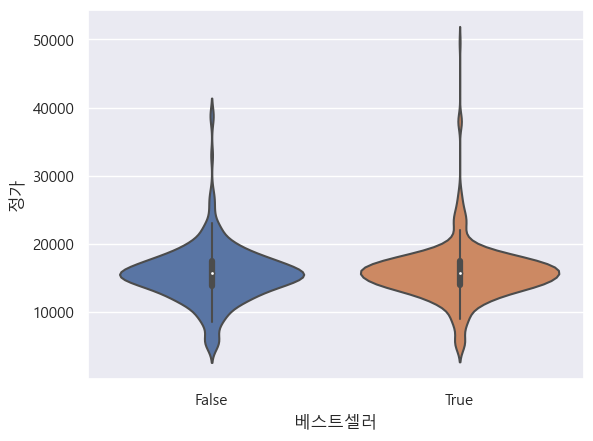

In [192]:
sns.violinplot(data=seller, x = '베스트셀러', y = '정가')
plt.show()

In [189]:
stats.shapiro(seller['정가'])

ShapiroResult(statistic=0.8636937737464905, pvalue=7.484469204340916e-30)

In [213]:
stats.mannwhitneyu(seller['정가'][seller['베스트셀러']], seller['정가'][-seller['베스트셀러']])

MannwhitneyuResult(statistic=154686.5, pvalue=0.5134903979402077)

In [195]:
A = seller[seller['베스트셀러']].value_counts('대분야')     # 낮은그룹
B = seller[-seller['베스트셀러']].value_counts('대분야')    # 높은그룹

In [202]:
AB = pd.merge(pd.DataFrame(A), pd.DataFrame(B), left_index=True, right_index=True)

In [211]:
chi2, p, dof, expected = stats.chi2_contingency(AB['count_x'], AB['count_y'])

In [212]:
p

1.0

In [219]:
#A
seller[-seller['베스트셀러']]

,월,순위,도서명,저자,출판사,출판 일자,정가,적립포인트,대분야,ISBN,낮은 그룹,베스트셀러
50,2021년,51,우리가 빛의 속도로 갈 수 없다면,김초엽,허블,20190624,14000,700,SF/과학소설,9791190090018,높은 그룹,False
51,2021년,52,해커스 토익 LC 리스닝(Listening) 토익 기본서,David Cho,해커스어학연구소,20220110,18800,940,L/C,9788965423355,높은 그룹,False
52,2021년,53,"아들아, 돈 공부해야 한다",정선용(정스토리),알에이치코리아,20210325,15800,790,투자가이드/자산관리,9788925588902,높은 그룹,False
53,2021년,54,작별하지 않는다,한강,문학동네,20210909,14000,700,한국소설일반,9788954682152,높은 그룹,False
54,2021년,55,왜 일하는가,이나모리 가즈오,다산북스,20210412,16000,800,비즈니스소양,9791130637037,높은 그룹,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1095,10월,96,누구에게도 상처받을 필요는 없다,지민석,스튜디오오드리,20220408,14000,700,한국에세이,9791191043709,높은 그룹,False
1096,10월,97,그리스 로마 신화 30: 기나긴 모험 그 끝의 이야기,박시연,아울북,20220914,15000,750,종교/신화,9788950971656,높은 그룹,False
1097,10월,98,참 괜찮은 태도,박지현,메이븐,20220930,16800,840,인문교양,9791190538480,높은 그룹,False
1098,10월,99,인생의 역사,신형철,난다,20221017,18000,900,한국에세이,9791191859379,높은 그룹,False


In [216]:
B

대분야
인문교양         41
자기관리/처세      40
한국에세이        40
한국소설일반       35
한국작가         19
             ..
드라마작품         1
주역            1
사회문화/사회교육     1
액션/무협만화       1
미술작품집         1
Name: count, Length: 117, dtype: int64